In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *

In [3]:
import pandas as pd
import os
import glob
from PIL import Image
import os.path
from shutil import copyfile

In [4]:
df = pd.read_csv('/home/shashankhalo7/training_set.csv')
df

,image_name,x1,x2,y1,y2
0,JPEG_20160517_140621_1000651031832.png,78,446,83,422
1,1473231510890DeeplearnS11456.png,73,567,146,351
2,1476881557883Untitled1.png,13,561,124,362
3,1474264827890cobalt-beyond-the-sea-maxi-dress3...,0,640,140,330
4,JPEG_20160711_113321_1000235741992.png,217,442,65,465
5,147954714706311.png,48,592,47,480
6,JPEG_20161117_154532_1000146348308.png,160,591,127,359
7,1469052256414DSC_0653.png,37,640,0,480
8,14581478747652.png,197,438,113,364
9,JPEG_20161207_165644_1000961805303.png,206,448,143,364


In [5]:
Path = '/home/jupyter/tutorials/data/grid/train/'
Path1 = '/home/jupyter/tutorials/data/grid/images/'

In [9]:
file_list=os.listdir(Path1)
i=0
for index, row in df.iterrows():
    filename=f'{row["image_name"]}'
    if filename in file_list:
        copyfile(Path1+filename, Path+filename)
    img = Image.open(Path+filename)
    print(i)
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
for index, row in df.iterrows():
    foo=f'{row["image_name"]}'
    filename = foo[:-4]+'.txt'
    with open(Path+filename, "w+") as file:
        file.write(str(row['x1'])+' '+str(row['x2'])+' '+str(row['y1'])+' '+str(row['y2'])) 

In [6]:
fname='1476881557883Untitled1.png'

## Getting and converting the data

In [7]:
path = Path('/home/jupyter/tutorials/data/grid/train')
path_ann=Path('/home/jupyter/tutorials/data/grid/annotations')

In [8]:
def img2txt_name(f): return path_ann/f'{str(f)[:-4]}.txt'

In [10]:
img = open_image(path/fname)
img.size

NameError: name 'fname' is not defined

In [31]:
ctr = np.genfromtxt(img2txt_name(fname)); ctr

array([ 13., 561., 124., 362.])

In [9]:
def convert_coords(coords):
    x1 = coords[0] 
    x2 = coords[1] 
    y1 = coords[2]
    y2 = coords[3]
    return tensor([y2,x2])

def get_coords(f):
    coords = np.genfromtxt(img2txt_name(f))
    return convert_coords(coords)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [83]:
get_coords(fname)

tensor([362., 561.])

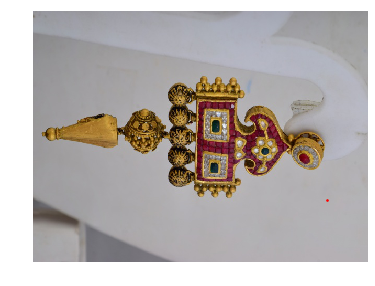

In [84]:
ctr = get_coords(fname)
img.show(y=get_ip(img, ctr), figsize=(6, 6))

## Creating a dataset

In [10]:
data = (PointsItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_func(get_coords)
        .databunch().normalize(imagenet_stats)
       )

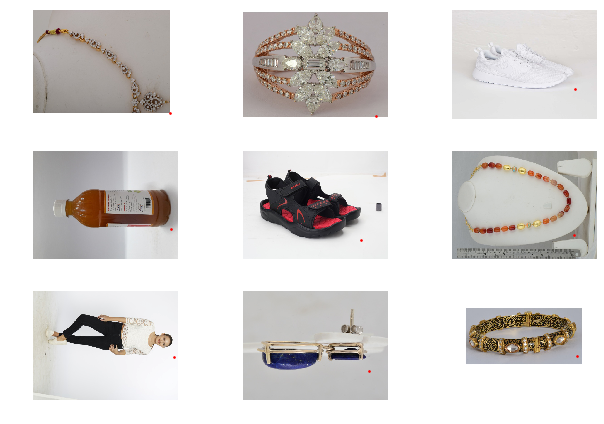

In [10]:
data.show_batch(3, figsize=(9,6))

## Train model bottom right

In [11]:
learn = create_cnn(data, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02


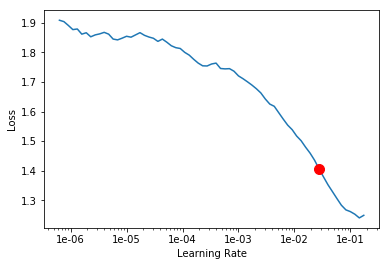

In [12]:
learn.lr_find()
learn.recorder.plot()

In [19]:
lr = 2e-2

In [19]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss
1,0.014028,0.023780
2,0.013718,0.020204
3,0.011673,0.019986
4,0.008581,0.018221
5,0.010455,0.017314


In [17]:
learn.save('stage-ff4-right-bottom')

In [16]:
learn.load('stage-ff3-right-bottom');

FileNotFoundError: [Errno 2] No such file or directory: '/home/jupyter/tutorials/data/grid/train/models/stage-ff4-right-bottom.pth'

In [14]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


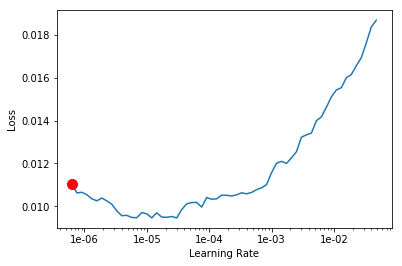

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(2, max_lr=slice(3e-7,3e-6))

epoch,train_loss,valid_loss
1,0.017451,0.007247
2,0.010222,0.007011


In [29]:
learn.save('stage-ff3-right-bottom')

In [26]:
learn.fit_one_cycle(2, max_lr=slice(1e-7,1e-5))

epoch,train_loss,valid_loss
1,0.010836,0.006885
2,0.010317,0.006978


In [28]:
learn.fit_one_cycle(2, max_lr=slice(1e-7))

epoch,train_loss,valid_loss
1,0.012317,0.006935
2,0.021256,0.006842


In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-8,1e-7))

epoch,train_loss,valid_loss
1,0.012867,0.007374
2,0.012570,0.007448


In [24]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-7))

epoch,train_loss,valid_loss
1,0.010538,0.007271
2,0.010770,0.007143
3,0.012856,0.007179
4,0.010203,0.007151
5,0.011912,0.007165


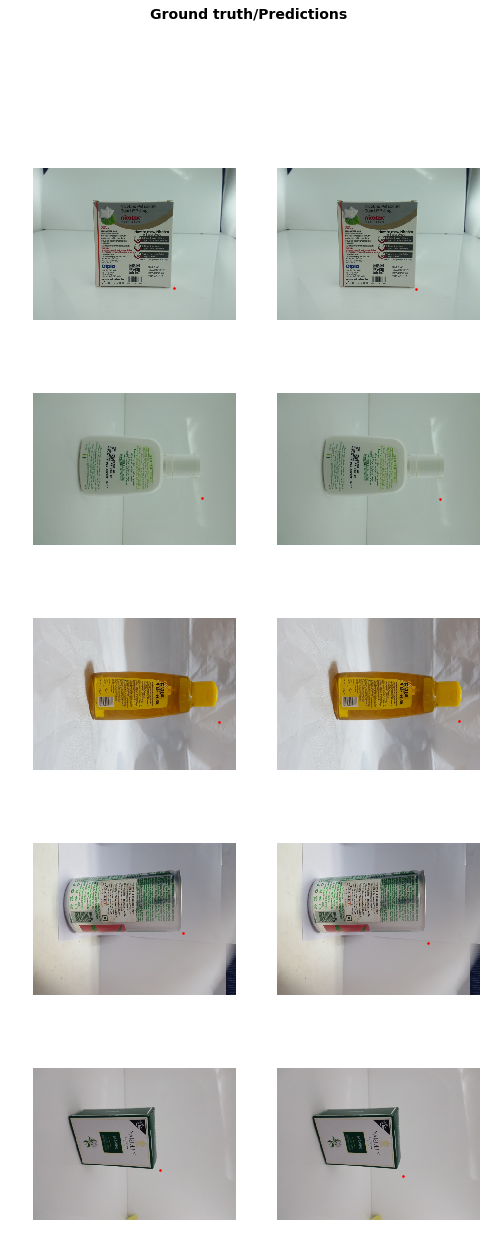

In [14]:
learn.show_results()

In [18]:
def convert_coords(coords):
    x1 = coords[0] 
    x2 = coords[1] 
    y1 = coords[2]
    y2 = coords[3]
    return tensor([y1,x1])

def get_coords_top(f):
    coords = np.genfromtxt(img2txt_name(f))
    return convert_coords(coords)

def get_ip(img,pts): return ImagePoints(FlowField(img.size, pts), scale=True)

In [19]:
data_top = (PointsItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_func(get_coords_top)
        .databunch(bs=24).normalize(imagenet_stats)
       )

In [24]:
learner_top=create_cnn(data_top, models.resnet34)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


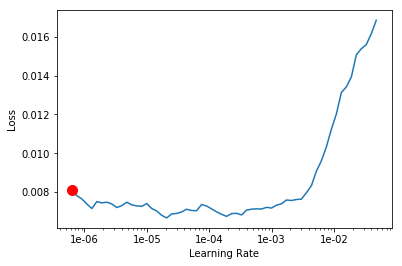

In [32]:
learner_top.lr_find()
learner_top.recorder.plot()

In [18]:
learner_top.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss
1,0.033007,0.027399
2,0.022659,0.316944
3,0.015423,0.092700
4,0.010232,0.025895
5,0.008427,0.313655


In [34]:
learner_top.save('stage-ff3-left-top')

In [25]:
learner_top.load('stage-2-left-top')

Learner(data=ImageDataBunch;

Train: LabelList (19200 items)
x: PointsItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: PointsLabelList
ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640)
Path: /home/jupyter/tutorials/data/grid/train;

Valid: LabelList (4800 items)
x: PointsItemList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: PointsLabelList
ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640),ImagePoints (480, 640)
Path: /home/jupyter/tutorials/data/grid/train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilatio

In [26]:
learner_top.unfreeze()

In [33]:
learner_top.fit_one_cycle(2, slice(1e-5,1e-4))

epoch,train_loss,valid_loss
1,0.007547,0.004535
2,0.005629,0.003990


In [30]:
learner_top.fit_one_cycle(2, slice(1e-5))

epoch,train_loss,valid_loss
1,0.006998,0.004507
2,0.108618,0.004614


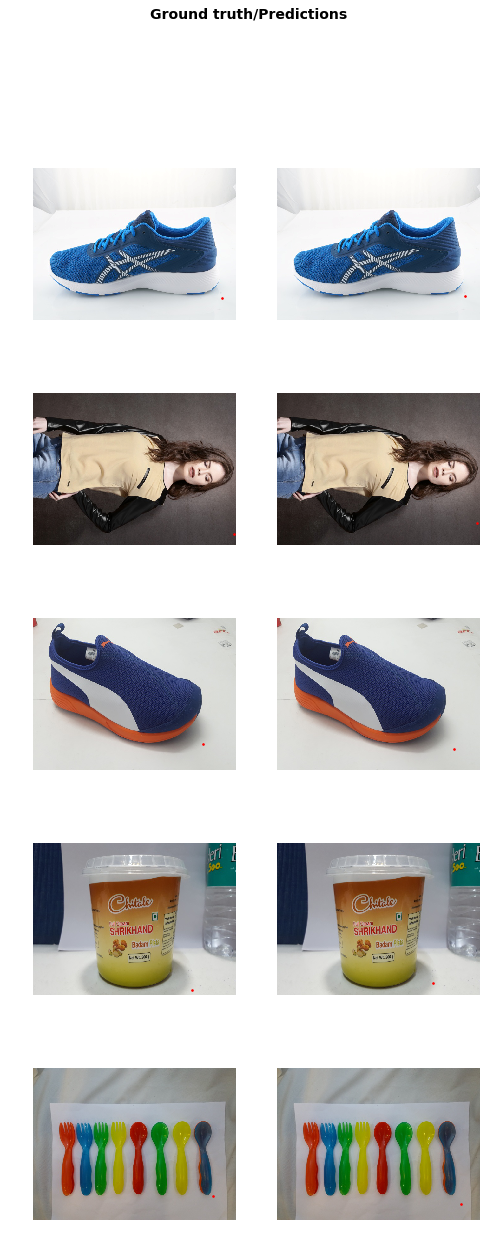

In [35]:
learn.show_results()

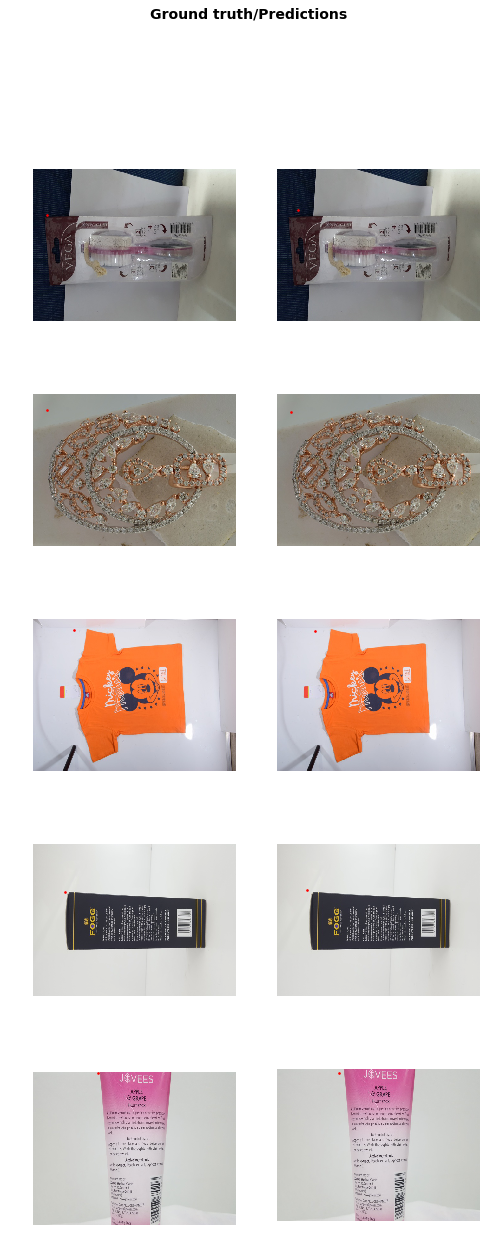

In [36]:
learner_top.show_results()

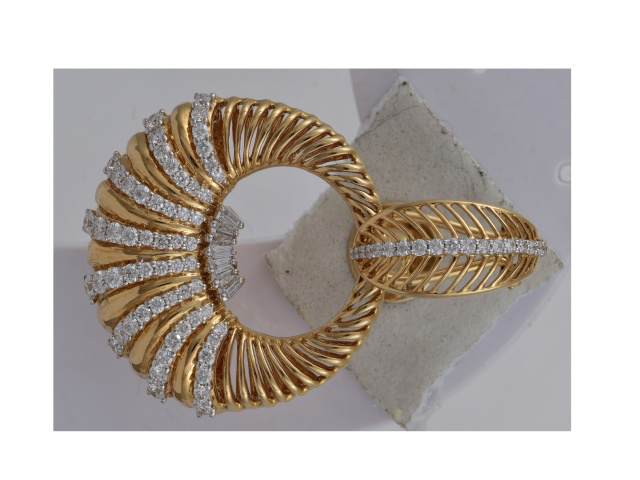

In [203]:
img = open_image(path_test/'1467891670691DSC_0582.png')
img

In [121]:
imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [122]:
denormalize(learn.predict(img)[1],tensor(imagenet_stats[0]),tensor(imagenet_stats[1]))

tensor([[[0.5928, 0.6673]],

        [[0.5614, 0.6343]],

        [[0.5119, 0.5851]]])

In [115]:
doc(ImageDataBunch)

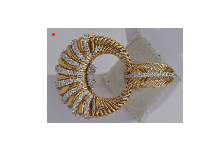

In [213]:
35.231.110.231 img.show(y=learner_top.predict(img)[0])

In [216]:
y=learn.predict(img)

In [217]:
y

(ImagePoints (480, 640), tensor([[0.7632, 0.7432]]), tensor([0.7632, 0.7432]))

In [37]:
def denorm_y(y):return (y+1)*240
def denorm_x(x):return (x+1)*320

In [219]:
y_1=np.array(y[1])

In [220]:
denorm_x(y_1[0][1])

557.8129196166992

In [38]:
df = pd.read_csv('/home/shashankhalo7/test_new.csv')
df

,image_name,x1,x2,y1,y2
0,1467891670691DSC_0582.png,NaN,NaN,NaN,NaN
1,1475151786691DSC00560.png,NaN,NaN,NaN,NaN
2,1480334114405_R2A3620.png,NaN,NaN,NaN,NaN
3,JPEG_20160712_161047_1000606860114.png,NaN,NaN,NaN,NaN
4,JPEG_20160403_174522_-1137349501.png,NaN,NaN,NaN,NaN
5,1472901299234DSC_3812.png,NaN,NaN,NaN,NaN
6,JPEG_20160711_122349_1000194202357.png,NaN,NaN,NaN,NaN
7,1477045740188DSC_8170.png,NaN,NaN,NaN,NaN
8,14581995558443A.png,NaN,NaN,NaN,NaN
9,JPEG_20161116_182832_100030341860.png,NaN,NaN,NaN,NaN


In [39]:
path_test=Path('/home/jupyter/tutorials/data/grid/images')

In [41]:
x1=list()
y1=list()
x2=list()
y2=list()

In [42]:
for row in df.iterrows():
    fname=row[1]['image_name']
    img = open_image(path_test/fname)
    top=learner_top.predict(img)
    bottom=learn.predict(img)
    top_coord=np.array(top[1])
    bottom_coord=np.array(bottom[1])
    x1.append(denorm_x(top_coord[0][1]))
    y1.append(denorm_y(top_coord[0][0]))
    x2.append(denorm_x(bottom_coord[0][1]))
    y2.append(denorm_y(bottom_coord[0][0]))

In [191]:
len(x1)

24045

In [192]:
df.columns

Index(['image_name', 'x1', 'x2', 'y1', 'y2'], dtype='object')

In [44]:
df['x1']=x1

In [45]:
df['y1']=y1

In [46]:
df['y2']=y2
df['x2']=x2

In [48]:
df.to_csv('shashank_final.csv')

In [50]:
learn.export('model_learn.pkl')

In [58]:
learner_top.export('model_learner_top.pkl')

TypeError: export() takes from 1 to 2 positional arguments but 3 were given